In [1]:
import pandas as pd
import numpy as np

C:\Users\ACAL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [46]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [48]:
pip install --upgrade threadpoolctl


  Obtaining dependency information for threadpoolctl from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv('C://Users//ACAL//Downloads//archive (50)//OnlineRetail.csv', encoding="latin1")

print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [3]:
df=df.dropna(subset=['CustomerID'])

In [4]:
df=df[~df['InvoiceNo'].str.startswith('C')]

In [5]:
df=df[~df['Quantity']<0]

In [6]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [7]:
df['CustomerID']=df['CustomerID'].astype(int)

In [8]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  


In [9]:
df.to_csv('cleaned_Online_Retail.csv',index=False)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

In [11]:
monthly_sales=df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

In [12]:
print(monthly_sales)

InvoiceDate
2010-12    312280
2011-01    349147
2011-02    265638
2011-03    348544
2011-04    292225
2011-05    373685
2011-06    363699
2011-07    369432
2011-08    398938
2011-09    544899
2011-10    593908
2011-11    681888
2011-12    287413
Freq: M, Name: Quantity, dtype: int64


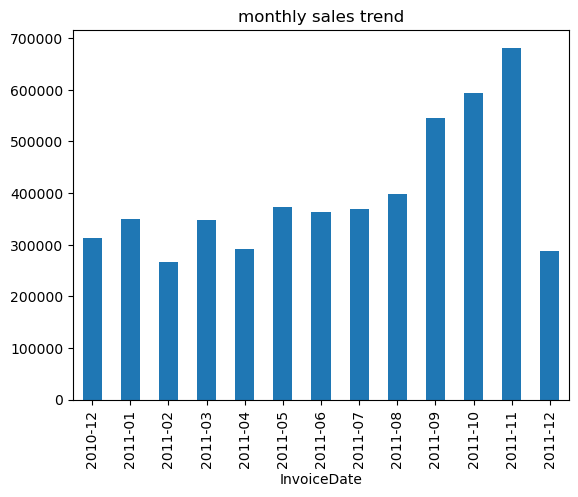

In [13]:
monthly_sales.plot(kind='bar')
plt.title("monthly sales trend")
plt.show()

In [14]:
sales_by_each_customer=df.groupby(df['CustomerID'])['Quantity'].sum()
print(sales_by_each_customer.sort_values(ascending=
                                         False).head(10))

CustomerID
14646    197491
16446     80997
14911     80515
12415     77670
12346     74215
17450     69993
17511     64549
18102     64124
13694     63312
14298     58343
Name: Quantity, dtype: int64


In [15]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [16]:
# Reference date (e.g., one day after last invoice)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                  # Frequency
    'TotalPrice': 'sum'                                      # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()




,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])



C:\Users\ACAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

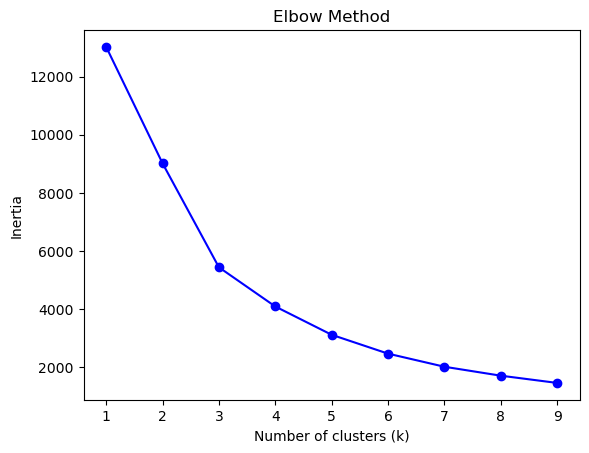

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


C:\Users\ACAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
rfm.groupby('Cluster').mean().sort_values('Recency')

,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
2,15435.000000,7.384615,82.692308,127338.313846
0,15201.928910,15.672986,22.047393,12453.225924
3,15290.717982,43.910580,3.655748,1349.698298
1,15344.258004,248.564030,1.551789,478.107581


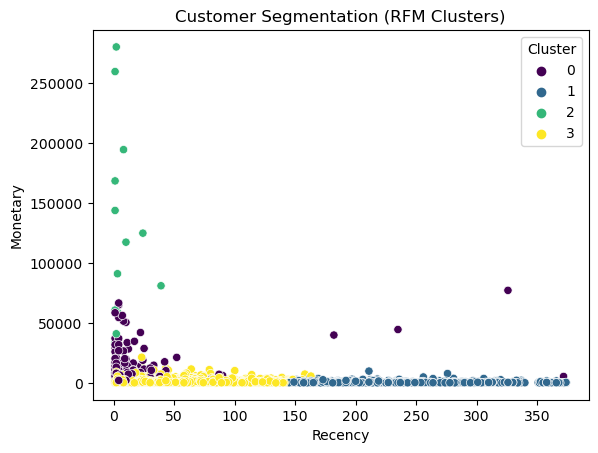

In [21]:
import seaborn as sns

sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation (RFM Clusters)')
plt.show()


In [22]:
rfm.to_csv('rfm_segmented_customers.csv', index=False)
